# Using Natural Language Processing to Identify and Predict Clickbait Headlines

In [1]:
#Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Here I want to see the list of stopwords included from WordCloud - these are words that will be removed from NLP functions
print(STOPWORDS)

{'here', 'like', 'were', 'again', 'very', 'am', 'below', "i'd", 'that', 'this', "shan't", 'into', 'more', 'while', 'hers', 'therefore', "weren't", 'his', 'r', 'each', "isn't", "wasn't", 'her', "it's", 'no', 'who', "why's", 'down', 'on', 'my', 'shall', "that's", "there's", "aren't", 'ourselves', "they'd", 'about', 'you', 'yourselves', 'myself', "they're", "who's", 'when', 'hence', 'ought', 'both', 'doing', 'com', 'the', 'too', 'why', 'further', "he'd", 'however', "wouldn't", "what's", 'which', 'those', 'own', 'get', 'could', 'same', "they'll", "shouldn't", 'him', 'in', "when's", 'ever', "i'll", 'theirs', 'what', 'to', 'else', 'was', 'being', 'have', 'it', "i'm", 'yourself', 'himself', 'during', "let's", 'them', 'a', 'also', 'from', 'off', 'themselves', "don't", "can't", 'with', 'do', 'just', "she's", 'whom', 'has', 'our', "doesn't", "haven't", 'an', "he'll", 'before', 'most', "didn't", 'can', 'there', 'not', 'up', 'through', "they've", "couldn't", 'would', 'but', 'over', 'she', 'is', "h

In [3]:
#Having examined the data, I'm aware of fairly commen use of the letters s and u in the headlines.
#This is a little confusing because I'd assume these would be used in conjunction to refer to the United States of America, 
#but 'US' already exists in the list and is fairly common
STOPWORDS = list(STOPWORDS) + ['s', 'S', 'u', 'U']

In [4]:
# Import the data into a dataframe
ClickBait = pd.read_csv(r"C:\Users\benja\Dropbox\Ben Code\Springboard not GIT linked\Click Bait Data\clickbait_data.csv")

In [5]:
#Let's get an overview of the data here
ClickBait.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [6]:
ClickBait.dtypes

headline     object
clickbait     int64
dtype: object

## Begin EDA
### OK, so we have two columns here, only the headline and whether or not it's clickbait. I'd like to add a couple more columns to help describe the data.

In [7]:
#Here I'm breaking out all of the headlines into individual words to count
h_d = []
for i in ClickBait['headline']:
    h_d.append(i.split())

print(h_d[:2])

[['Should', 'I', 'Get', 'Bings'], ['Which', 'TV', 'Female', 'Friend', 'Group', 'Do', 'You', 'Belong', 'In']]


In [8]:
#Now we'll calculate how many words in each headline, 
#and we can see if there's a trend of number of words in clickbait vs. not clickbait headlines
length = []
for i in h_d:
    length.append(len(i))
    
print(length[:2])

[4, 9]


In [9]:
#So we have an object - the headline, and a clickbait boolean value, also it looks like our first headline may have a typo
#Next let's create some more summary features to help identify clickbait articles
#First we'll count the total number of words in each headline:
ClickBait['Word Count'] = length

(15999, 16001)


Text(0.5, 1.0, 'Counts of Clickbait and Not Clickbait Headlines')

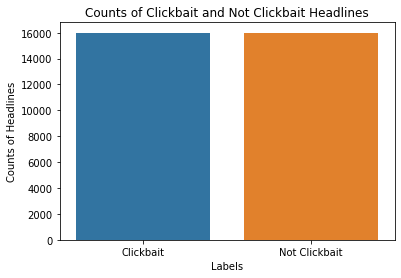

In [10]:
#Let's take a look at some of our data:
#first let's create a new dataframe to visualize our numbers of clickbait and not clickbait headlines
def clickbait_count(x):
    NC = 0
    C = 0
    for y in x:
        if y == 1: 
            C += 1
        else:
            NC += 1
    return(C, NC)
            
counts = clickbait_count(ClickBait['clickbait'])

print(counts)

labels = ['Clickbait', 'Not Clickbait']
values = [15999, 16001]

df = pd.DataFrame({'Labels': labels, 'Count of Headlines': values})

sns.barplot(data = df, x = 'Labels', y = 'Count of Headlines')
plt.ylabel('Counts of Headlines')
plt.title('Counts of Clickbait and Not Clickbait Headlines')

### Wow, almost the same size data sets, that's great! Next lets compute the average length of clickbait and not clickbait headlines

[9.941808863053941, 8.188613211674271] ['Clickbait', 'Not Clickbait']


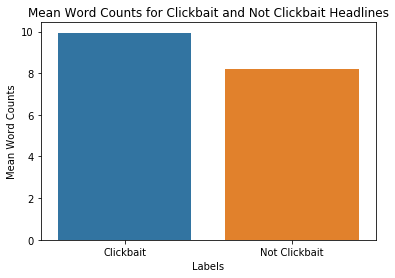

In [11]:
mean_labels = ['Clickbait', 'Not Clickbait']

clickbait_words = ClickBait.loc[ClickBait['clickbait'] == 1]
not_clickbait_words = ClickBait.loc[ClickBait['clickbait'] == 0]
mean_clickbait_words = np.mean(clickbait_words['Word Count'])
mean_not_clickbait_words = np.mean(not_clickbait_words['Word Count'])

mean_counts = [mean_clickbait_words, mean_not_clickbait_words]

print(mean_counts, mean_labels)

mean_words = pd.DataFrame({'Labels': mean_labels, 'Mean Counts': mean_counts})

sns.barplot(data = mean_words, x = 'Labels', y = 'Mean Counts')
plt.ylabel('Mean Word Counts')
plt.title('Mean Word Counts for Clickbait and Not Clickbait Headlines')
plt.show()

### Ok so we have pretty even numbers for set of clickbait types, 15,999 clickbait headlines, and 16,001 not clickbait headlines. Next, let's generate some word clouds of the main words present in each set!

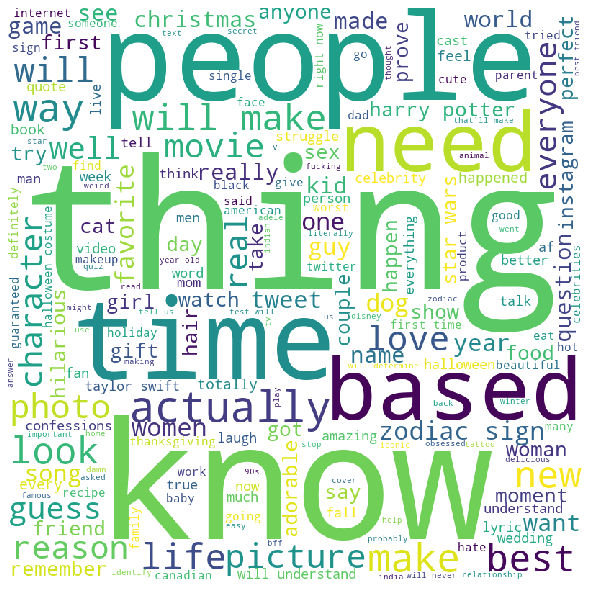

In [12]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in clickbait_words.headline:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

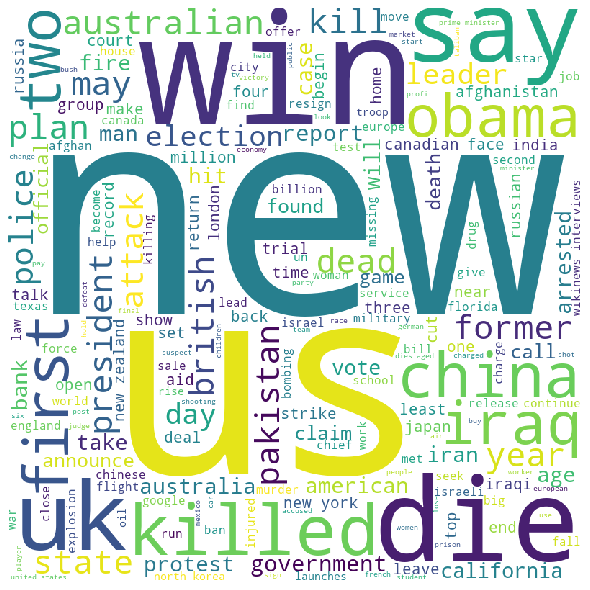

In [13]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in not_clickbait_words.headline:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()